# 1. Install and Import Dependencies

In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [2]:
!cd yolov5 & pip install -r requirements.txt

In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\user/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-11-12 torch 1.7.1+cu110 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)



  0%|          | 0.00/14.0M [00:00<?, ?B/s]

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
model

AutoShape(
  (model): Model(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (co

# 3. Make Detections with Images

In [8]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [9]:
results = model(img)
results.print()

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x00000238A2A744F0>

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()

# 4. Real Time Detections

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [10]:
import uuid   # Unique identifier
import os
import time

In [ ]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

In [11]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [12]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [18]:
import wandb
!wandb login 


wandb: Currently logged in as: deekshitha (use `wandb login --relogin` to force relogin)


In [19]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data data.yaml --weights yolov5s.pt --workers 2

github: up to date with https://github.com/ultralytics/yolov5 


module 'signal' has no attribute 'SIGALRM'
Optimizer stripped from runs\train\exp\weights\last.pt, 14.3MB
Optimizer stripped from runs\train\exp\weights\best.pt, 14.3MB



wandb: Currently logged in as: deekshitha (use `wandb login --relogin` to force relogin)
train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data\hyps\hyp.scratch.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2021-11-17 torch 1.7.1+cu110 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, t

    60/499     1.12G   0.05718    0.0183   0.01319       118       320:  50%|###
    60/499     1.12G   0.05732   0.01829   0.01317        80       320:  50%|###
    60/499     1.12G   0.05732   0.01829   0.01317        80       320:  58%|###
    60/499     1.12G    0.0579   0.01831     0.013       103       320:  58%|###
    60/499     1.12G   0.05838   0.01823   0.01293       103       320:  58%|###
    60/499     1.12G   0.05838   0.01823   0.01293       103       320:  67%|###
    60/499     1.12G   0.05849   0.01843   0.01274       112       320:  67%|###
    60/499     1.12G   0.05866   0.01854   0.01264        94       320:  67%|###
    60/499     1.12G   0.05866   0.01854   0.01264        94       320:  75%|###
    60/499     1.12G   0.05893   0.01864   0.01266        95       320:  75%|###
    60/499     1.12G   0.05925   0.01855   0.01256        77       320:  75%|###
    60/499     1.12G   0.05925   0.01855   0.01256        77       320:  83%|###
    60/499     1.12G   0.059


               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Im

               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        371       1222       0.85      0.695      0.767      0.367

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/24 [00:00<?

   270/499     1.12G   0.03908   0.01297  0.002964        83       320:  67%|###
   270/499     1.12G   0.03902   0.01302  0.002876        95       320:  67%|###
   270/499     1.12G   0.03906   0.01304  0.002861        98       320:  67%|###
   270/499     1.12G   0.03906   0.01304  0.002861        98       320:  75%|###
   270/499     1.12G   0.03903   0.01307  0.002854        86       320:  75%|###
   270/499     1.12G   0.03877   0.01293  0.002789        72       320:  75%|###
   270/499     1.12G   0.03877   0.01293  0.002789        72       320:  83%|###
   270/499     1.12G    0.0386   0.01286  0.002797        89       320:  83%|###
   270/499     1.12G   0.03833   0.01287  0.002718        85       320:  83%|###
   270/499     1.12G   0.03833   0.01287  0.002718        85       320:  92%|###
   270/499     1.12G   0.03817   0.01286  0.002697        85       320:  92%|###
   270/499     1.12G    0.0381   0.01303  0.002691        16       320:  92%|###
   270/499     1.12G    0.03

   349/499     1.12G    0.0285   0.01087  0.001497        77       320:  29%|##9
   349/499     1.12G    0.0285   0.01087  0.001497        77       320:  38%|###
   349/499     1.12G   0.02842   0.01075   0.00151        76       320:  38%|###
   349/499     1.12G   0.02853   0.01085  0.001502       109       320:  38%|###
   349/499     1.12G   0.02853   0.01085  0.001502       109       320:  46%|###
   349/499     1.12G   0.02909    0.0107  0.001489        70       320:  46%|###
   349/499     1.12G    0.0292   0.01056  0.001473        68       320:  46%|###
   349/499     1.12G    0.0292   0.01056  0.001473        68       320:  54%|###
   349/499     1.12G   0.02926    0.0104  0.001435        77       320:  54%|###
   349/499     1.12G   0.02939   0.01057  0.001387        82       320:  54%|###
   349/499     1.12G   0.02939   0.01057  0.001387        82       320:  62%|###
   349/499     1.12G    0.0295   0.01048  0.001363        80       320:  62%|###
   349/499     1.12G    0.02

  0%|          | 0/24 [00:00<?, ?it/s]                                          
   416/499     1.12G   0.02711   0.01291  0.002056        98       320:   0%|   
   416/499     1.12G   0.02583   0.01293  0.001519       109       320:   0%|   
   416/499     1.12G   0.02583   0.01293  0.001519       109       320:   8%|8  
   416/499     1.12G   0.02634   0.01221  0.001322        83       320:   8%|8  
   416/499     1.12G    0.0259   0.01174  0.001308        90       320:   8%|8  
   416/499     1.12G    0.0259   0.01174  0.001308        90       320:  17%|#6 
   416/499     1.12G   0.02651   0.01178  0.001334        90       320:  17%|#6 
   416/499     1.12G   0.02653   0.01151  0.001259       103       320:  17%|#6 
   416/499     1.12G   0.02653   0.01151  0.001259       103       320:  25%|##5
   416/499     1.12G    0.0264   0.01128  0.001245        82       320:  25%|##5
   416/499     1.12G   0.02699   0.01123  0.001224       108       320:  25%|##5
   416/499     1.12G   0.026

   489/499     1.12G   0.02455  0.009862  0.001111        72       320:  67%|###
   489/499     1.12G   0.02458  0.009891  0.001153        92       320:  67%|###
   489/499     1.12G   0.02458  0.009891  0.001153        92       320:  75%|###
   489/499     1.12G   0.02484  0.009835  0.001199        84       320:  75%|###
   489/499     1.12G   0.02491  0.009763  0.001275        72       320:  75%|###
   489/499     1.12G   0.02491  0.009763  0.001275        72       320:  83%|###
   489/499     1.12G   0.02482  0.009745   0.00125        86       320:  83%|###
   489/499     1.12G   0.02478  0.009767  0.001231        90       320:  83%|###
   489/499     1.12G   0.02478  0.009767  0.001231        90       320:  92%|###
   489/499     1.12G   0.02467   0.00986  0.001218        91       320:  92%|###
   489/499     1.12G   0.02454  0.009889  0.001212        22       320:  92%|###
   489/499     1.12G   0.02454  0.009889  0.001212        22       320: 100%|###
   489/499     1.12G   0.024

github: up to date with https://github.com/ultralytics/yolov5 

module 'signal' has no attribute 'SIGALRM'
Optimizer stripped from runs\train\exp2\weights\last.pt, 14.3MB
Optimizer stripped from runs\train\exp2\weights\best.pt, 14.3MB



wandb: Currently logged in as: deekshitha (use `wandb login --relogin` to force relogin)
train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data\hyps\hyp.scratch.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2021-11-17 torch 1.7.1+cu110 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, t

    15/499     1.12G   0.07582    0.0189   0.02207        86       320:  29%|##9
    15/499     1.12G   0.07582    0.0189   0.02207        86       320:  38%|###
    15/499     1.12G   0.07598   0.01872   0.02207        99       320:  38%|###
    15/499     1.12G   0.07614    0.0186    0.0231        85       320:  38%|###
    15/499     1.12G   0.07614    0.0186    0.0231        85       320:  46%|###
    15/499     1.12G   0.07609   0.01862   0.02277        86       320:  46%|###
    15/499     1.12G   0.07553   0.01869    0.0226        77       320:  46%|###
    15/499     1.12G   0.07553   0.01869    0.0226        77       320:  54%|###
    15/499     1.12G     0.075   0.01861   0.02226        99       320:  54%|###
    15/499     1.12G   0.07464   0.01877   0.02256       109       320:  54%|###
    15/499     1.12G   0.07464   0.01877   0.02256       109       320:  62%|###
    15/499     1.12G    0.0744   0.01889   0.02253       109       320:  62%|###
    15/499     1.12G   0.074

    67/499     1.12G   0.05743   0.01744   0.01211        86       320:  75%|###
    67/499     1.12G   0.05725   0.01738   0.01218        74       320:  75%|###
    67/499     1.12G   0.05725   0.01738   0.01218        74       320:  83%|###
    67/499     1.12G   0.05744   0.01743   0.01266       122       320:  83%|###
    67/499     1.12G   0.05726   0.01758   0.01252        91       320:  83%|###
    67/499     1.12G   0.05726   0.01758   0.01252        91       320:  92%|###
    67/499     1.12G   0.05692   0.01751   0.01227        77       320:  92%|###
    67/499     1.12G   0.05683   0.01727   0.01221         8       320:  92%|###
    67/499     1.12G   0.05683   0.01727   0.01221         8       320: 100%|###
    67/499     1.12G   0.05683   0.01727   0.01221         8       320: 100%|###

               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Im

    83/499     1.12G   0.05424   0.02034   0.01151       111       320:   8%|8  
    83/499     1.12G   0.05441   0.01951   0.01083        81       320:   8%|8  
    83/499     1.12G   0.05441   0.01951   0.01083        81       320:  17%|#6 
    83/499     1.12G    0.0561   0.01922   0.01049       102       320:  17%|#6 
    83/499     1.12G    0.0572   0.01925    0.0103       114       320:  17%|#6 
    83/499     1.12G    0.0572   0.01925    0.0103       114       320:  25%|##5
    83/499     1.12G   0.05688   0.01906  0.009781        88       320:  25%|##5
    83/499     1.12G   0.05678   0.01865   0.01045        89       320:  25%|##5
    83/499     1.12G   0.05678   0.01865   0.01045        89       320:  33%|###
    83/499     1.12G   0.05681    0.0186   0.01044        99       320:  33%|###
    83/499     1.12G    0.0565   0.01863   0.01078        82       320:  33%|###
    83/499     1.12G    0.0565   0.01863   0.01078        82       320:  42%|###
    83/499     1.12G   0.055


     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/24 [00:00<?, ?it/s]                                          
   146/499     1.12G   0.04841   0.01552  0.004274        87       320:   0%|   
   146/499     1.12G   0.04841   0.01552  0.004274        87       320:   4%|4  
   146/499     1.12G   0.04425   0.01466  0.004256        75       320:   4%|4  
   146/499     1.12G   0.04425   0.01466  0.004256        75       320:   8%|8  
   146/499     1.12G   0.04445   0.01516  0.003875        94       320:   8%|8  
   146/499     1.12G   0.04483   0.01549  0.004602       100       320:   8%|8  
   146/499     1.12G   0.04483   0.01549  0.004602       100       320:  17%|#6 
   146/499     1.12G   0.04494   0.01599  0.004943       100       320:  17%|#6 
   146/499     1.12G   0.04494   0.01599  0.004943       100       320:  21%|## 
   146/499     1.12G   0.04511   0.01635  0.004822        92       320:  21%|## 
   146/499     1.12G   0.04511   0.0

               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        371       1222      0.769      0.607      0.672      0.294

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/24 [00:00<?, ?it/s]                                          
   155/499     1.12G   0.04155

               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        371       1222      0.839      0.758      0.809      0.405

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/24 [00:00<?, ?it/s]                                          
   224/499     1.12G   0.04126   0.01518  0.003702        86       320:   0%|   
   224/499     1.12G    0.0397   0.01301  0.003378        70       320:   0%|   
   224/499     1.12G    0.0397   0.01301  0.003378        70       320:   8%|8  
   224/499     1.12G   0.03886   0.01177  0.003759        60       320:   8%|8  
   224/499     1.12G    0.0388   0.01167  0.003298        88       320:   8%|8  
   224/499     1.12G    0.0388   0.01167  0.003298        88       320:  17%|#6 
   224/499     1.12G   0.03883

   233/499     1.12G   0.03978   0.01301  0.003138        97       320:  83%|###
   233/499     1.12G   0.03962   0.01289  0.003131        66       320:  83%|###
   233/499     1.12G   0.03971   0.01303  0.003086       101       320:  83%|###
   233/499     1.12G   0.03971   0.01303  0.003086       101       320:  92%|###
   233/499     1.12G   0.03963   0.01303  0.003195        80       320:  92%|###
   233/499     1.12G   0.03943   0.01287  0.003094         8       320:  92%|###
   233/499     1.12G   0.03943   0.01287  0.003094         8       320: 100%|###
   233/499     1.12G   0.03943   0.01287  0.003094         8       320: 100%|###

               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Im

   303/499     1.12G   0.03451   0.01243   0.00241        95       320:  42%|###
   303/499     1.12G   0.03445   0.01208  0.002322        61       320:  42%|###
   303/499     1.12G   0.03436   0.01238  0.002273       126       320:  42%|###
   303/499     1.12G   0.03436   0.01238  0.002273       126       320:  50%|###
   303/499     1.12G    0.0341   0.01224  0.002634        70       320:  50%|###
   303/499     1.12G   0.03413   0.01229  0.002526        83       320:  50%|###
   303/499     1.12G   0.03413   0.01229  0.002526        83       320:  58%|###
   303/499     1.12G   0.03416   0.01235  0.002456       118       320:  58%|###
   303/499     1.12G   0.03416   0.01227  0.002477        83       320:  58%|###
   303/499     1.12G   0.03416   0.01227  0.002477        83       320:  67%|###
   303/499     1.12G   0.03429   0.01235  0.002544       102       320:  67%|###
   303/499     1.12G   0.03427   0.01234  0.002575        96       320:  67%|###
   303/499     1.12G   0.034

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/24 [00:00<?, ?it/s]                                          
   312/499     1.12G   0.03134   0.01124  0.001242        81       320:   0%|   
   312/499     1.12G   0.03133   0.01055  0.001404        81       320:   0%|   
   312/499     1.12G   0.03133   0.01055  0.001404        81       320:   8%|8  
   312/499     1.12G   0.03228   0.01187  0.001979       103       320:   8%|8  
   312/499     1.12G   0.03331   0.01234  0.001831        94       320:   8%|8  
   312/499     1.12G   0.03331   0.01234  0.001831        94       320:  17%|#6 
   312/499     1.12G   0.03299   0.01254  0.001724       102       320:  17%|#6 
   312/499     1.12G   0.03278   0.01205  0.001795        61       320:  17%|#6 
   312/499     1.12G   0.03278   0.01205  0.001795        61       320:  25%|##5
   312/499     1.12G   0.03271   0.01192  0.001748        76       320:  25%|##5
   312/499     1.12G   0.03286   0.01

               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        

   390/499     1.12G   0.02717   0.01056  0.001228        70       320:  75%|###
   390/499     1.12G   0.02706   0.01068  0.001226       116       320:  75%|###
   390/499     1.12G   0.02715    0.0107  0.001239        77       320:  75%|###
   390/499     1.12G   0.02715    0.0107  0.001239        77       320:  83%|###
   390/499     1.12G   0.02719   0.01065  0.001235        92       320:  83%|###
   390/499     1.12G   0.02719   0.01074  0.001221        92       320:  83%|###
   390/499     1.12G   0.02719   0.01074  0.001221        92       320:  92%|###
   390/499     1.12G   0.02713   0.01068   0.00121        85       320:  92%|###
   390/499     1.12G   0.02687   0.01087  0.001181        22       320:  92%|###
   390/499     1.12G   0.02687   0.01087  0.001181        22       320: 100%|###
   390/499     1.12G   0.02687   0.01087  0.001181        22       320: 100%|###

               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Im


     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/24 [00:00<?, ?it/s]                                          
   452/499     1.12G   0.02483  0.009039 0.0004432        78       320:   0%|   
   452/499     1.12G   0.02483  0.009039 0.0004432        78       320:   4%|4  
   452/499     1.12G   0.02603  0.009291  0.001066        75       320:   4%|4  
   452/499     1.12G   0.02603  0.009291  0.001066        75       320:   8%|8  
   452/499     1.12G   0.02597  0.009809 0.0009317        93       320:   8%|8  
   452/499     1.12G    0.0261  0.009448   0.00116        68       320:   8%|8  
   452/499     1.12G    0.0261  0.009448   0.00116        68       320:  17%|#6 
   452/499     1.12G   0.02609  0.009268  0.001154        78       320:  17%|#6 
   452/499     1.12G   0.02653   0.00935  0.001134        84       320:  17%|#6 
   452/499     1.12G   0.02653   0.00935  0.001134        84       320:  25%|##5
   452/499     1.12G   0.02604  0.00

               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        371       1222      0.941      0.917      0.949      0.649

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/24 [00:00<?, ?it/s]                                          
   467/499     1.12G   0.02366  0.009036 0.0005468        78       320:   0%|   
   467/499     1.12G    0.0233  0.009527 0.0005734        83       320:   0%|   
   467/499     1.12G    0.0233

# 6. Load Custom Model

In [21]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\user/.cache\torch\hub\master.zip
YOLOv5  2021-11-17 torch 1.7.1+cu110 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)

Fusing layers... 
Model Summary: 213 layers, 7029004 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [54]:
img = os.path.join('data', 'images', 'c3_118_JPG.rf.f3e091f26c6fdb7576fa2453d6bbfefc.jpg')

In [55]:
results = model(img)

In [56]:
results.print()

image 1/1: 144x256 3 dental caries-3-s, 3 dental caries-5-s
Speed: 9.0ms pre-process, 16.0ms inference, 3.0ms NMS per image at shape (1, 3, 384, 640)


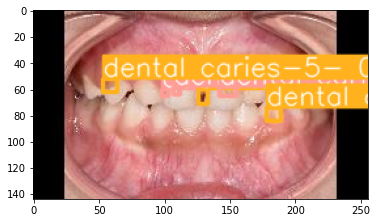

In [57]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [15]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()